In [12]:
# Run this code if you get errors with missing requirements
import sys
!{sys.executable} -m pip install mysql-connector

import pandas as pd
import mysql.connector

mydb = mysql.connector.connect(
  host="iiwari-mariadb-server",
  user="root",
  passwd="d41k4Duu",
  database="iiwari_org"
)



In [13]:
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, COUNT(node_id), timestamp FROM SensorData   WHERE timestamp > '2019-05-24 13:05:08.078133+00:00' AND timestamp < '2019-05-29 13:05:08.078133+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND   q <100 AND z = 0 GROUP BY node_id ");
df = pd.DataFrame(mycursor.fetchall())
print(df)

#COUNT ja GROUP BY jo hakuvaiheessa



    node_id  COUNT(node_id)                            timestamp
0      3200           54824  b'2019-05-24 13:18:02.994616+00:00'
1      3224           11449  b'2019-05-24 15:40:09.994598+00:00'
2      3240            1879   b'2019-05-25 06:39:14.99468+00:00'
3     51719           32469  b'2019-05-24 16:18:18.994673+00:00'
4     51735          102006  b'2019-05-25 06:38:44.994583+00:00'
5     51751           45886  b'2019-05-24 13:05:08.987771+00:00'
6     51850          104681  b'2019-05-25 05:08:54.995013+00:00'
7     51866          113297  b'2019-05-24 13:06:52.995091+00:00'
8     51889          268178  b'2019-05-24 13:05:31.995048+00:00'
9     51968           25528  b'2019-05-24 13:17:21.994477+00:00'
10    51976           66253  b'2019-05-24 13:05:08.987162+00:00'
11    51992            1325  b'2019-05-25 06:25:51.994608+00:00'
12    52003           13915  b'2019-05-25 06:40:26.994632+00:00'
13    52008               1  b'2019-05-28 09:14:51.995571+00:00'
14    52023              

TypeError: Cannot convert input [0     b'2019-05-24 13:18:02.994616+00:00'
1     b'2019-05-24 15:40:09.994598+00:00'
2      b'2019-05-25 06:39:14.99468+00:00'
3     b'2019-05-24 16:18:18.994673+00:00'
4     b'2019-05-25 06:38:44.994583+00:00'
5     b'2019-05-24 13:05:08.987771+00:00'
6     b'2019-05-25 05:08:54.995013+00:00'
7     b'2019-05-24 13:06:52.995091+00:00'
8     b'2019-05-24 13:05:31.995048+00:00'
9     b'2019-05-24 13:17:21.994477+00:00'
10    b'2019-05-24 13:05:08.987162+00:00'
11    b'2019-05-25 06:25:51.994608+00:00'
12    b'2019-05-25 06:40:26.994632+00:00'
13    b'2019-05-28 09:14:51.995571+00:00'
14    b'2019-05-24 14:19:46.991544+00:00'
15    b'2019-05-24 13:13:02.994582+00:00'
16    b'2019-05-24 13:05:29.987097+00:00'
17     b'2019-05-24 13:15:31.99536+00:00'
18    b'2019-05-24 16:21:17.994677+00:00'
19    b'2019-05-24 22:19:10.994551+00:00'
20     b'2019-05-24 19:52:00.99486+00:00'
21    b'2019-05-25 00:13:53.994617+00:00'
22    b'2019-05-24 16:23:19.994682+00:00'
Name: timestamp, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

# Tehdään dataframe ja laitetaan siihen kaikki data sekä tehdään prosenttiosuus kärreistä

In [5]:
nodet = pd.DataFrame()


nodet['node_id'] = df['node_id']
nodet['count'] = df['COUNT(node_id)']
nodet['prosenttiosuus'] = 100 * (df['COUNT(node_id)'] / (df['COUNT(node_id)'].sum()))

print(nodet)

    node_id   count  prosenttiosuus
0      3200   54824        3.267714
1      3224   11449        0.682403
2      3240    1879        0.111995
3     51719   32469        1.935273
4     51735  102006        6.079936
5     51751   45886        2.734976
6     51850  104681        6.239376
7     51866  113297        6.752921
8     51889  268178       15.984403
9     51968   25528        1.521563
10    51976   66253        3.948924
11    51992    1325        0.078975
12    52003   13915        0.829386
13    52008       1        0.000060
14    52023      59        0.003517
15    52099   96707        5.764096
16    52535  130067        7.752475
17    53011   74043        4.413237
18    53130  201303       11.998405
19    53888       1        0.000060
20    53924   18429        1.098437
21    53936   33171        1.977115
22    54016  282277       16.824756


# Plotataan node_id ja prosenttiosuus

Text(0.5, 0, 'Kärryn numero')

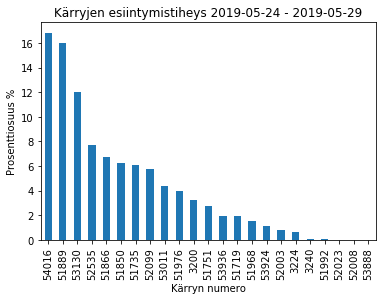

In [7]:
import pylab as plt

nodet.groupby("node_id").prosenttiosuus.mean().sort_values(ascending=False)[:23].plot.bar(title='Kärryjen esiintymistiheys 2019-05-24 - 2019-05-29')
plt.ylabel('Prosenttiosuus %')
plt.xlabel('Kärryn numero')